In [67]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, chi2
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# data source: https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1
# 2.9M loan entries with 142 attributes

df_sample = pd.read_csv("data/Loan_status_2007-2020Q3.csv", nrows=1000)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df_sample.dtypes

Unnamed: 0                                      int64
id                                              int64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [9]:
df_sample.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704,700,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN,Jun-2017,739,735,0,NaN,1,Ind

In [10]:
# Count missing values per column
missing_counts = df_sample.isnull().sum()
missing_counts

Unnamed: 0                                       0
id                                               0
loan_amnt                                        0
funded_amnt                                      0
funded_amnt_inv                                  0
term                                             0
int_rate                                         0
installment                                      0
grade                                            0
sub_grade                                        0
emp_title                                       51
emp_length                                      17
home_ownership                                   0
annual_inc                                       0
verification_status                              0
issue_d                                          0
loan_status                                      0
pymnt_plan                                       0
url                                              0
purpose                        

In [11]:
# Calculate the percentage of missing values per column
missing_percentage = df_sample.isnull().mean()
missing_percentage

Unnamed: 0                                    0.000
id                                            0.000
loan_amnt                                     0.000
funded_amnt                                   0.000
funded_amnt_inv                               0.000
term                                          0.000
int_rate                                      0.000
installment                                   0.000
grade                                         0.000
sub_grade                                     0.000
emp_title                                     0.051
emp_length                                    0.017
home_ownership                                0.000
annual_inc                                    0.000
verification_status                           0.000
issue_d                                       0.000
loan_status                                   0.000
pymnt_plan                                    0.000
url                                           0.000
purpose     

In [61]:
# only remove columns with mainly missing values 
cols_to_keep = missing_percentage[missing_percentage <= 0.75].index
cols_to_keep

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcie

In [62]:
lst_cols = cols_to_keep.tolist()

In [63]:
df_non = df_sample[lst_cols]

In [64]:
unique_counts = df_non.nunique(dropna=False)
unique_counts

Unnamed: 0                    1000
id                            1000
loan_amnt                      213
funded_amnt                    250
funded_amnt_inv                324
term                             2
int_rate                        34
installment                    720
grade                            7
sub_grade                       34
emp_title                      920
emp_length                      12
home_ownership                   3
annual_inc                     284
verification_status              3
issue_d                          1
loan_status                      2
pymnt_plan                       1
url                           1000
purpose                         13
title                          544
zip_code                       378
addr_state                      42
dti                            823
delinq_2yrs                      4
earliest_cr_line               268
fico_range_low                  30
fico_range_high                 30
inq_last_6mths      

In [65]:
# Drop columns with only one value or ID-like columns from the dataframe

cols_to_drop = unique_counts[(unique_counts == 1) | (unique_counts == len(df_sample))].index
df_clean = df_non.drop(columns=cols_to_drop)
list(cols_to_drop)

['Unnamed: 0',
 'id',
 'issue_d',
 'pymnt_plan',
 'url',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag']

In [66]:
df_clean.isna().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                  51
emp_length                 17
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
fico_range_low              0
fico_range_high             0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_

In [47]:
# remove columns with majority NaN values
threshold = 0.7  # Keep columns with ≤70% NaN values
df_clean = df_clean.dropna(axis=1, thresh=int(len(df_clean) * (1 - threshold)))

In [46]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,3,0,13648,83.7%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704,700,0,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,3,0,1687,9.4%,4,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499,0,0,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,2,0,2956,98.5%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739,735,0,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-1996,690,694,1,35.0,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604,600,0,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Fully Paid,other,Personal,972xx,OR,17.94,0,Jan-1996,695,699,0,38.0,15,0,27783,53.9%,38,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017,67.30,Apr-2018,684,680,0,N


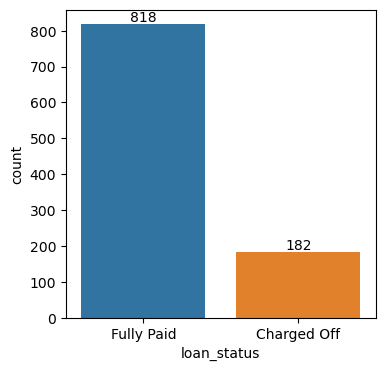

In [125]:
palette = {
    'Fully Paid': '#1f77b4',     # blue
    'Charged Off': '#ff7f0e',    # orange
}

plt.figure(figsize=(4, 4))

# Create plot
ax = sns.countplot(data=df_clean, 
                   x='loan_status',
                   hue='loan_status',
                   palette=palette)

# Add counts on bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height(), 
            f'{int(bar.get_height())}', 
            ha='center', 
            va='bottom')

plt.show()

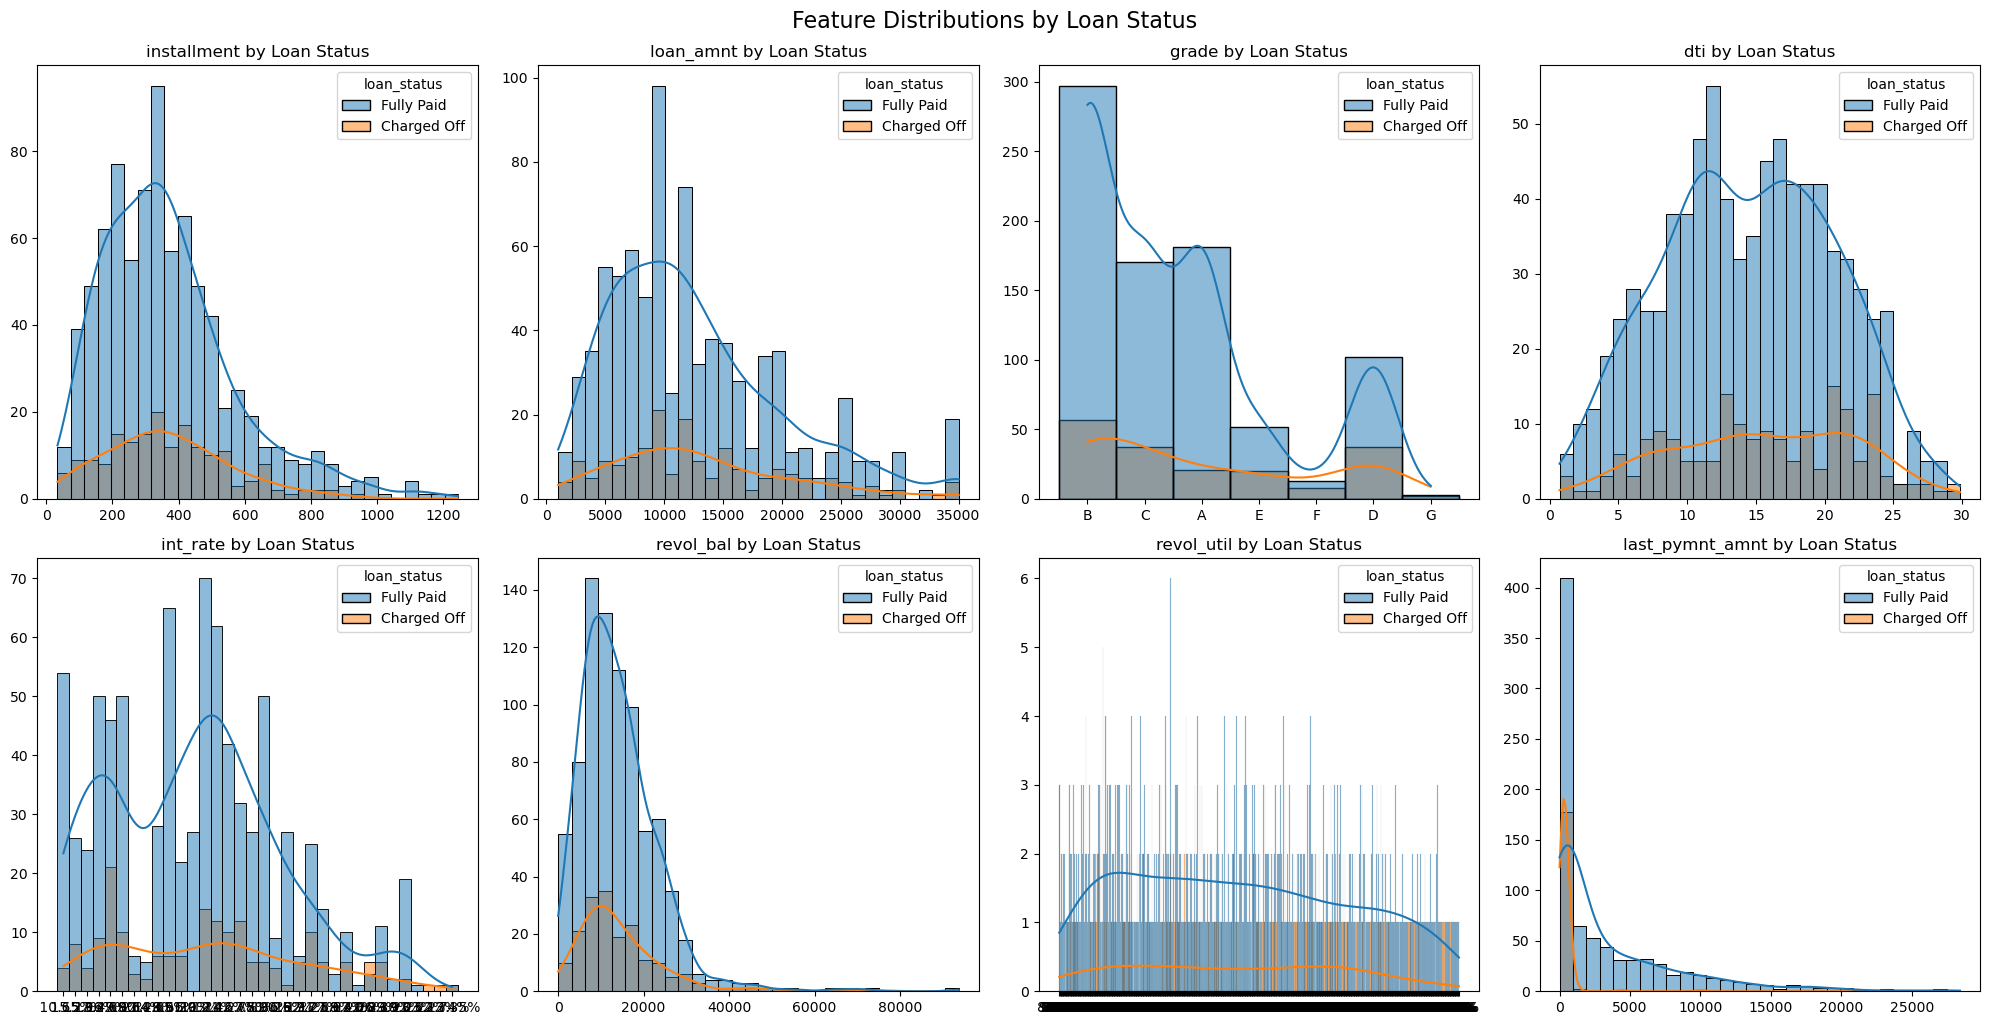

In [136]:
# List of numeric variables you want to plot
num_vars = ['installment', 'loan_amnt', 'grade', 'dti', 'int_rate', 'revol_bal', 'revol_util', 'last_pymnt_amnt']

# Create 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to easily index

# Plot each variable
for i, var in enumerate(num_vars):
    ax = axes[i]
    sns.histplot(data=df_clean, x=var, hue='loan_status', ax=ax, bins=30, kde=True, palette=palette)
    ax.set_title(f'{var} by Loan Status', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Clean up layout
plt.tight_layout()
plt.suptitle('Feature Distributions by Loan Status', fontsize=16, y=1.02)
plt.show()

In [48]:
columns = df_clean.columns.tolist()

In [49]:
columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'pub_rec_bankruptcies',
 'debt_settlement_flag']

In [137]:
len(columns)

43

In [50]:
# Pearson correlation coefficients for all numeric columns
correlation_matrix = df_clean.corr(numeric_only=True)
correlation_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
loan_amnt,1.000000,0.959546,0.956788,0.888617,0.427616,0.080183,-0.017770,0.175409,0.175409,-0.007263,0.154447,-0.084150,0.393217,0.279785,0.849947,0.847507,0.806786,0.691579,0.118909,0.128503,0.096490,0.420726,0.052242,0.064355,-0.051261
funded_amnt,0.959546,1.000000,0.998199,0.953717,0.399326,0.068135,-0.040155,0.184258,0.184258,0.001682,0.133257,-0.108421,0.364831,0.234684,0.878069,0.876733,0.846939,0.683366,0.120425,0.122310,0.082946,0.411667,0.039980,0.054340,-0.079243
funded_amnt_inv,0.956788,0.998199,1.000000,0.955547,0.398087,0.066705,-0.039945,0.183212,0.183212,-0.000369,0.134423,-0.108233,0.363088,0.234517,0.876791,0.878363,0.848069,0.676874,0.116679,0.120518,0.080606,0.411757,0.041592,0.054746,-0.079021
installment,0.888617,0.953717,0.955547,1.000000,0.391630,0.054327,-0.039012,0.118534,0.118534,-0.002129,0.120434,-0.111570,0.343706,0.197970,0.821344,0.824880,0.828364,0.556496,0.107432,0.082969,0.045481,0.361689,0.030870,0.044061,-0.082649
annual_inc,0.427616,0.399326,0.398087,0.391630,1.000000,-0.214080,0.075093,0.073661,0.073661,-0.028891,0.285284,-0.058282,0.390338,0.395706,0.382687,0.381268,0.386952,0.259519,0.080548,0.026369,0.041028,0.224339,0.114481,0.073712,-0.050435
dti,0.080183,0.068135,0.066705,0.054327,-0.214080,1.000000,-0.114866,-0.137110,-0.137110,0.042443,0.244010,-0.031856,0.279960,0.192504,0.063387,0.061809,0.044177,0.085199,-0.026274,0.037093,0.044590,0.023630,-0.063650,-0.013470,-0.032907
delinq_2yrs,-0.017770,-0.040155,-0.039945,-0.039012,0.075093,-0.114866,1.000000,-0.161360,-0.161360,-0.032146,0.029854,0.028489,-0.095235,0.031629,-0.019384,-0.019818,-0.036592,0.032778,0.065508,-0.018377,-0.005826,-0.010242,-0.087398,-0.027745,0.045278
fico_range_low,0.175409,0.184258,0.183212,0.118534,0.073661,-0.137110,-0.161360,1.000000,1.000000,-0.108979,-0.088546,-0.084690,0.008013,0.094333,0.122410,0.122270,0.205628,-0.110764,-0.039431,-0.033836,-0.036435,0.061350,0.288472,0.212038,-0.081711
fico_range_high,0.175409,0.184258,0.183212,0.118534,0.073661,-0.137110,-0.161360,1.000000,1.000000,-0.108979,-0.088546,-0.084690,0.008013,0.094333,0.122410,0.122270,0.205628,-0.110764,-0.039431,-0.033836,-0.036435,0.061350,0.288472,0.212038,-0.081711
inq_last_6mths,-0.007263,0.001682,-0.000369,-0.002129,-0.028891,0.042443,-0.032146,-0.108979,-0.108979,1.000000,0.120497,-0.023983,-0.006412,0.078380,0.015853,0.013856,-0.016511,0.095544,-0.032686,-0.015843,-0.041128,0.016618,-0.050585,-0.057812,-0.018184


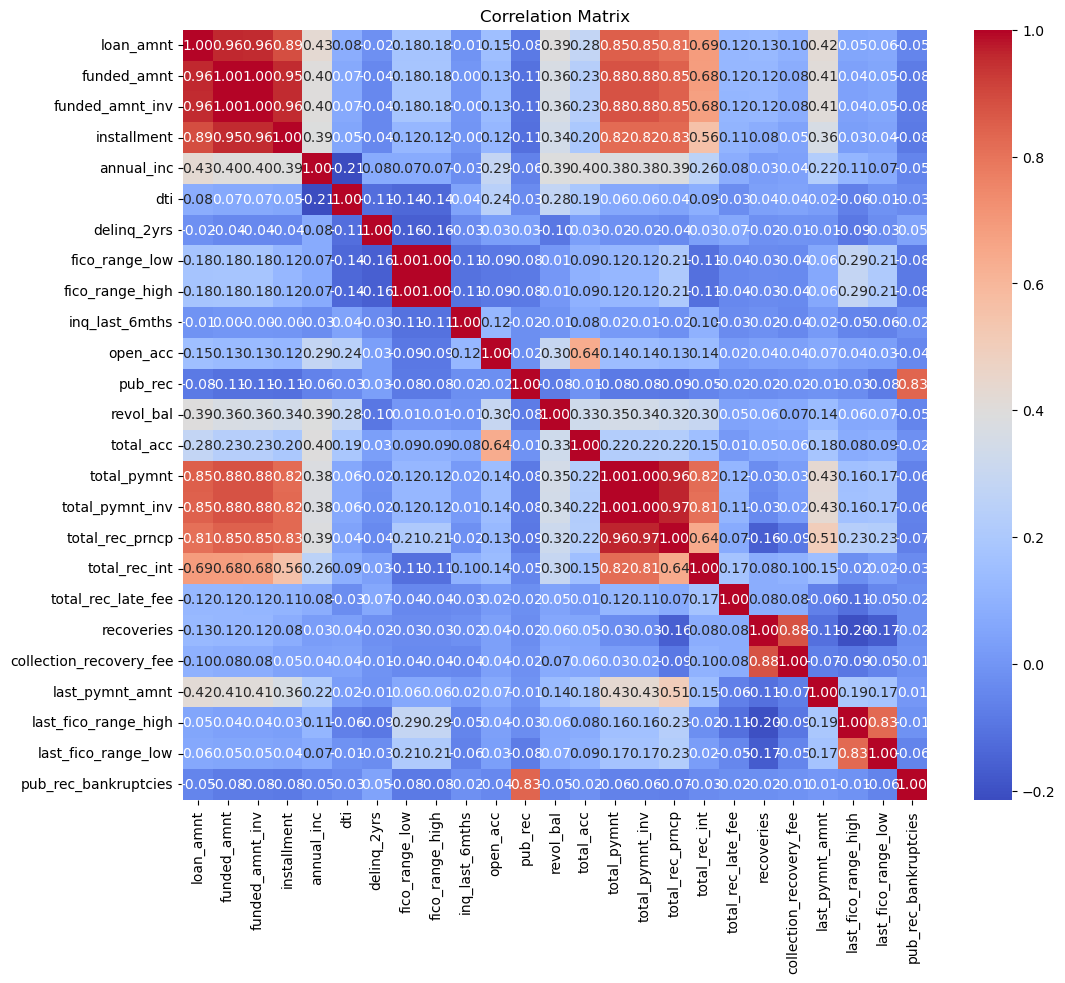

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [68]:
target_col = 'loan_status'

In [69]:
#  Separate numerical features and target
numerical_cols = correlation_matrix.columns.tolist()
# numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
X = df_clean[numerical_cols]

y = df_clean[target_col]

#  Run ANOVA F-test
f_scores, p_values = f_classif(X, y)


#  Create results DataFrame
anova_results = pd.DataFrame({
    'Feature': numerical_cols,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values('F_score', ascending=False)

In [58]:
# Add significance flag (common threshold: p < 0.05)
anova_results['significant'] = anova_results['p_value'] < 0.05
anova_results

,Feature,F_score,p_value,significant
22,last_fico_range_high,301.241164,3.574131e-59,True
23,last_fico_range_low,236.891180,4.003313e-48,True
19,recoveries,229.447254,8.284773e-47,True
16,total_rec_prncp,200.329792,1.396633e-41,True
15,total_pymnt_inv,101.785559,7.385159e-23,True
14,total_pymnt,98.295203,3.664134e-22,True
20,collection_recovery_fee,75.292963,1.627001e-17,True
21,last_pymnt_amnt,70.749380,1.389941e-16,True
18,total_rec_late_fee,11.911554,5.812443e-04,True
7,fico_range_low,9.312910,2.335634e-03,True


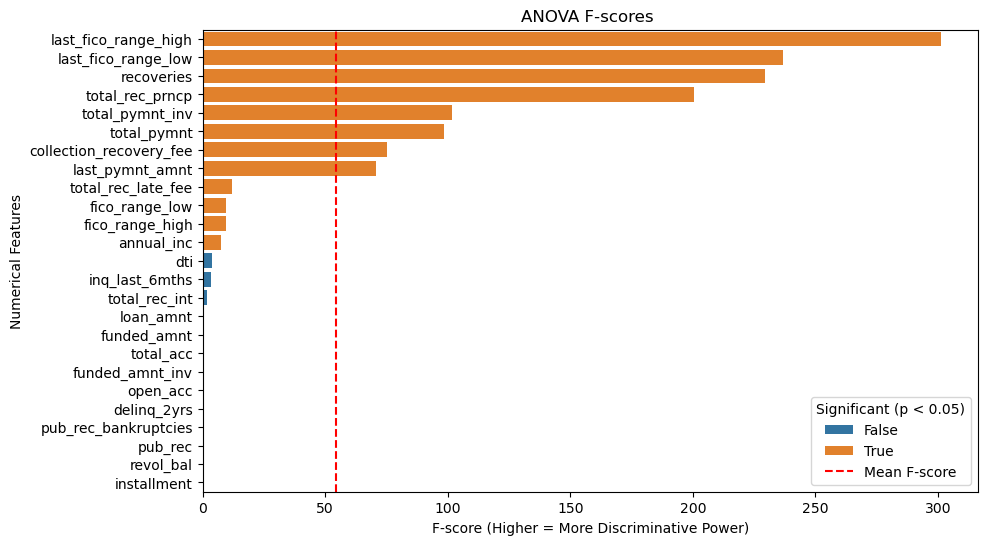

In [60]:
#  Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=anova_results, x='F_score', y='Feature', hue='significant', dodge=False)
plt.title('ANOVA F-scores ')
plt.xlabel('F-score (Higher = More Discriminative Power)')
plt.ylabel('Numerical Features')
plt.axvline(x=np.mean(f_scores), color='red', linestyle='--', label='Mean F-score')
plt.legend(title='Significant (p < 0.05)')
plt.show()

In [70]:
#  Separate categorical features and target
categorical_cols = df_clean.select_dtypes(include=['object', 'category', 'bool']).columns.drop(target_col)
X_cat = df_clean[categorical_cols]
y = df_clean[target_col]

#  Apply Chi-Square test
chi2_scores, p_values = chi2(pd.get_dummies(X_cat), y)  # One-hot encode categorical features first

In [80]:
categorical_cols.shape

(17,)

In [100]:
from scipy.stats import chi2_contingency

def chi_square_test(df, target_col):
    results = {}
    
    # Loop through all categorical columns except the target
    for col in df.select_dtypes(include=['object', 'category', 'bool']).columns:
        if col == target_col:
            continue
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[col], df[target_col])
        
        # Apply chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        results[col] = {
            'chi2_statistic': chi2,
            'p_value': p,
            'degrees_of_freedom': dof
        }
    
    # Convert results to a DataFrame for readability
    return pd.DataFrame(results).T.sort_values('chi2_statistic', ascending=False)

# Example usage
# df = your DataFrame with categorical features and a categorical target
# target = name of your target column, e.g., 'Loan_Status'

chi2_results = chi_square_test(df_clean, target_col=target_col)
print(chi2_results)

                      chi2_statistic       p_value  degrees_of_freedom
emp_title                 926.638376  4.142909e-01               918.0
title                     582.199816  1.185732e-01               543.0
revol_util                532.272943  8.347481e-01               565.0
last_credit_pull_d        508.560982  8.437716e-58                95.0
zip_code                  358.783065  7.421662e-01               377.0
earliest_cr_line          307.279093  4.542879e-02               267.0
last_pymnt_d              205.329630  8.706719e-18                60.0
sub_grade                  74.679295  4.547680e-05                33.0
int_rate                   74.679295  4.547680e-05                33.0
addr_state                 47.093027  2.373077e-01                41.0
debt_settlement_flag       40.018661  2.515482e-10                 1.0
grade                      27.558213  1.137785e-04                 6.0
term                       16.979985  3.777595e-05                 1.0
purpos

In [101]:
#  Add significance flag (p < 0.05)
chi2_results['significant'] = chi2_results['p_value'] < 0.05

chi2_results

,chi2_statistic,p_value,degrees_of_freedom,significant
emp_title,926.638376,4.142909e-01,918.0,False
title,582.199816,1.185732e-01,543.0,False
revol_util,532.272943,8.347481e-01,565.0,False
last_credit_pull_d,508.560982,8.437716e-58,95.0,True
zip_code,358.783065,7.421662e-01,377.0,False
earliest_cr_line,307.279093,4.542879e-02,267.0,True
last_pymnt_d,205.329630,8.706719e-18,60.0,True
sub_grade,74.679295,4.547680e-05,33.0,True
int_rate,74.679295,4.547680e-05,33.0,True
addr_state,47.093027,2.373077e-01,41.0,False


In [102]:
chi2_results = chi2_results.reset_index().rename(columns={"index": "Feature"})
chi2_results

,Feature,chi2_statistic,p_value,degrees_of_freedom,significant
0,emp_title,926.638376,4.142909e-01,918.0,False
1,title,582.199816,1.185732e-01,543.0,False
2,revol_util,532.272943,8.347481e-01,565.0,False
3,last_credit_pull_d,508.560982,8.437716e-58,95.0,True
4,zip_code,358.783065,7.421662e-01,377.0,False
5,earliest_cr_line,307.279093,4.542879e-02,267.0,True
6,last_pymnt_d,205.329630,8.706719e-18,60.0,True
7,sub_grade,74.679295,4.547680e-05,33.0,True
8,int_rate,74.679295,4.547680e-05,33.0,True
9,addr_state,47.093027,2.373077e-01,41.0,False


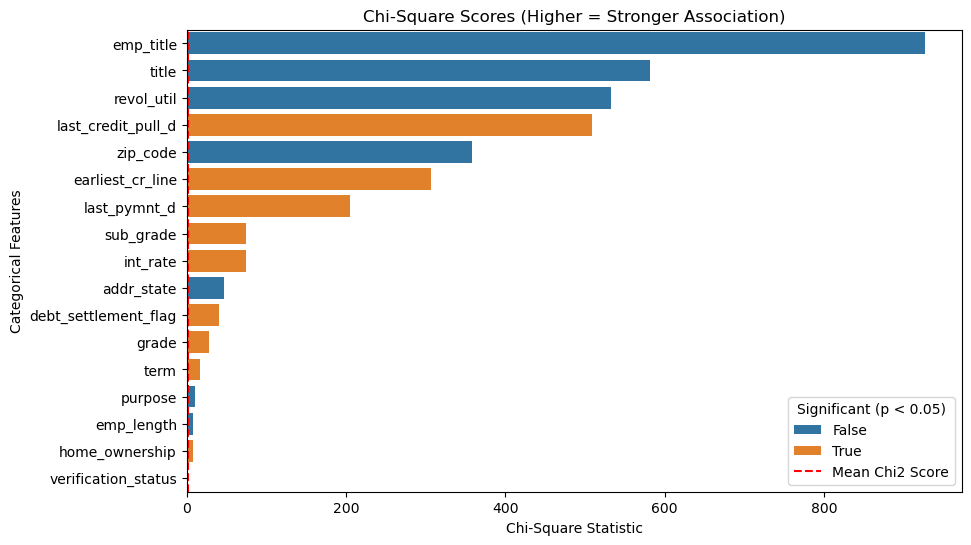

In [103]:
#  Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=chi2_results, x='chi2_statistic', y='Feature', hue='significant', dodge=False)
plt.title('Chi-Square Scores (Higher = Stronger Association)')
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Categorical Features')
plt.axvline(x=np.mean(chi2_scores), color='red', linestyle='--', label='Mean Chi2 Score')
plt.legend(title='Significant (p < 0.05)')
plt.show()

### Reference
- https://www.sciencedirect.com/science/article/pii/S2667305325000407
- Explainable AI based LightGBM prediction model to predict default borrower in social lending platform, Intelligent Systems with Applications
Volume 26, June 2025, 200514